# Assumptions Tester

Verifying assumptions:
1. Dependent and Independent variable must show a linear relationship
    1. check visually with pair plot
    2. if not, correct with allowing for polinomial regression line
2. No autocorrelation in residuals (difference btw. outcome and predicted…)
    1. Look at Durbin-Watson-Test in stats models summary: if 2 —> good
    2. if +/- —> centre independent variable by subtracting mean in lagged column
3. No Heteroskedacity (standard error along x axis is non-constant)
    1. check plot of residuals vs. fitted values (can also roughly estimate from the pair plot)
    2. if deviation from regression line increases over x  —> non-linear transformation of dependent variable
4. No Multicollinearity (= all predictor variables should be sufficiently independent from each other, otherwise p- and coefficient values cannot be trusted)
    1. check heatmap for correlation or calculate VIF
    2. if one variable with high multicollinearity —> remove it if you can (just don’t use it)
    3. (might be the case for number of jobs & job density)
5. Residuals must be normally distributed
    1. check histogram of residuals
    
reference: https://github.com/fahadanwar10/LinearRegression/blob/master/media-sales-linear-regression-verify-assumptions.ipynb

In [48]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
df = pd.read_csv("~/library/data/processed/borough-unemployment-and-business-data.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)

In [50]:
df.drop("code", axis=1,inplace=True)
df.drop("area", axis=1,inplace=True)
df.drop("year", axis=1,inplace=True)
df.drop('unemployment_rate', axis=1, inplace=True)
df.head()

,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,NVQ4_rate,youth_unemployment_rate,no_qualif_rate
0,455.0,54.5,54000,0.45,33.2,22.734367,8.6
1,1635.0,57.7,147000,0.62,57.3,9.944418,3.7
2,555.0,58.7,78000,0.53,29.6,10.870386,4.8
3,1085.0,56.7,115000,0.53,33.8,14.681718,8.2
4,990.0,62.7,119000,0.61,47.1,10.269752,5.4


### Multiple Linear Regression Model
- test the fit of geographical factors vs. qualifications to predict youth unemployment 

In [90]:
X=df.drop(['youth_unemployment_rate'],axis=1) #geographical factors set
X.drop('NVQ4_rate', axis=1, inplace=True)
X.drop('no_qualif_rate', axis=1, inplace=True)
#X.drop('3_year_survival_number', axis=1, inplace=True) #can be dropped optionally
X.drop('number_of_jobs', axis=1, inplace=True) #to prevent multicollinearity with job density

y=df.youth_unemployment_rate #youth unemployment set

Z=df.drop(['youth_unemployment_rate'],axis=1)
Z.drop('3_year_survival_number', axis=1, inplace=True) #qualifications factors set
Z.drop('3_year_survival_rate', axis=1, inplace=True)
Z.drop('number_of_jobs', axis=1, inplace=True)
Z.drop('job_density', axis=1, inplace=True)

X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(X, y, Z, test_size = 0.2, random_state = 0)

In [91]:
lr = LinearRegression()
model1=lr.fit(X_train, y_train)
ypred1 = model1.predict(X_test)
print("R-squared: {0}".format(metrics.r2_score(y_test,ypred1)))

R-squared: 0.3441551834362907


In [92]:
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.800
Model:                                 OLS   Adj. R-squared:                  0.795
Method:                      Least Squares   F-statistic:                     166.8
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):           1.58e-43
Time:                             20:31:38   Log-Likelihood:                -380.16
No. Observations:                      128   AIC:                             766.3
Df Residuals:                          125   BIC:                             774.9
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
3_year_survival_number    -0.0024      0.001     -2.486      0.014      -0.004      -0.000
3_year_survival_rate       0.1920      0.016     12.309      0.000       0.161       0.223
job_density                1.4054      0.908      1.548      0.124      -0.391       3.202
==============================================================================
Omnibus:                        5.734   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.315
Skew:                           0.434   Prob(JB):                       0.0701
Kurtosis:                       2.506   Cond. No.                     3.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
model2=lr.fit(Z_train, y_train)
ypred2 = model1.predict(Z_test)
print("R-squared: {0}".format(metrics.r2_score(y_test,ypred2)))
#looks like both can explain fairly little of the variation (probably unemployment_rate would explain more variation than these combined factors)
#but qualifications seem to be able to explain slightly more than geographcal factors
#might be prone to huge selection bias of factors...

R-squared: 0.23715802923396212


In [80]:
regressor_OLS = sm.OLS(endog = y, exog = Z).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.866
Model:                                 OLS   Adj. R-squared:                  0.863
Method:                      Least Squares   F-statistic:                     405.7
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):           1.24e-55
Time:                             19:38:53   Log-Likelihood:                -354.78
No. Observations:                      128   AIC:                             713.6
Df Residuals:                          126   BIC:                             719.3
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NVQ4_rate          0.0466      0.013      3.692      0.000       0.022       0.072
no_qualif_rate     1.3506      0.128     10.585      0.000       1.098       1.603
==============================================================================
Omnibus:                        7.569   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.350
Skew:                           0.575   Prob(JB):                       0.0254
Kurtosis:                       3.231   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#use backward elimination in case p-values too high
#e.g. 3_year_survival_rate seems to be highly likely to be found under the H0 (they cannot predict youth unemployment)
#X_opt = X.drop('3_year_survival_rate', axis=1)
#regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
#regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.894
Model:                                 OLS   Adj. R-squared:                  0.889
Method:                      Least Squares   F-statistic:                     206.7
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):           4.48e-58
Time:                             18:10:27   Log-Likelihood:                -339.80
No. Observations:                      128   AIC:                             689.6
Df Residuals:                          123   BIC:                             703.9
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
3_year_survival_number    -0.0053      0.001     -5.561      0.000      -0.007      -0.003
number_of_jobs          5.496e-05   1.35e-05      4.076      0.000    2.83e-05    8.17e-05
job_density               -6.0430      1.935     -3.123      0.002      -9.873      -2.213
NVQ4_rate                  0.1291      0.020      6.415      0.000       0.089       0.169
no_qualif_rate             1.2399      0.119     10.418      0.000       1.004       1.475
==============================================================================
Omnibus:                        5.703   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.208
Skew:                           0.470   Prob(JB):                       0.0740
Kurtosis:                       3.307   Cond. No.                     1.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing the assumptions for a linear regression

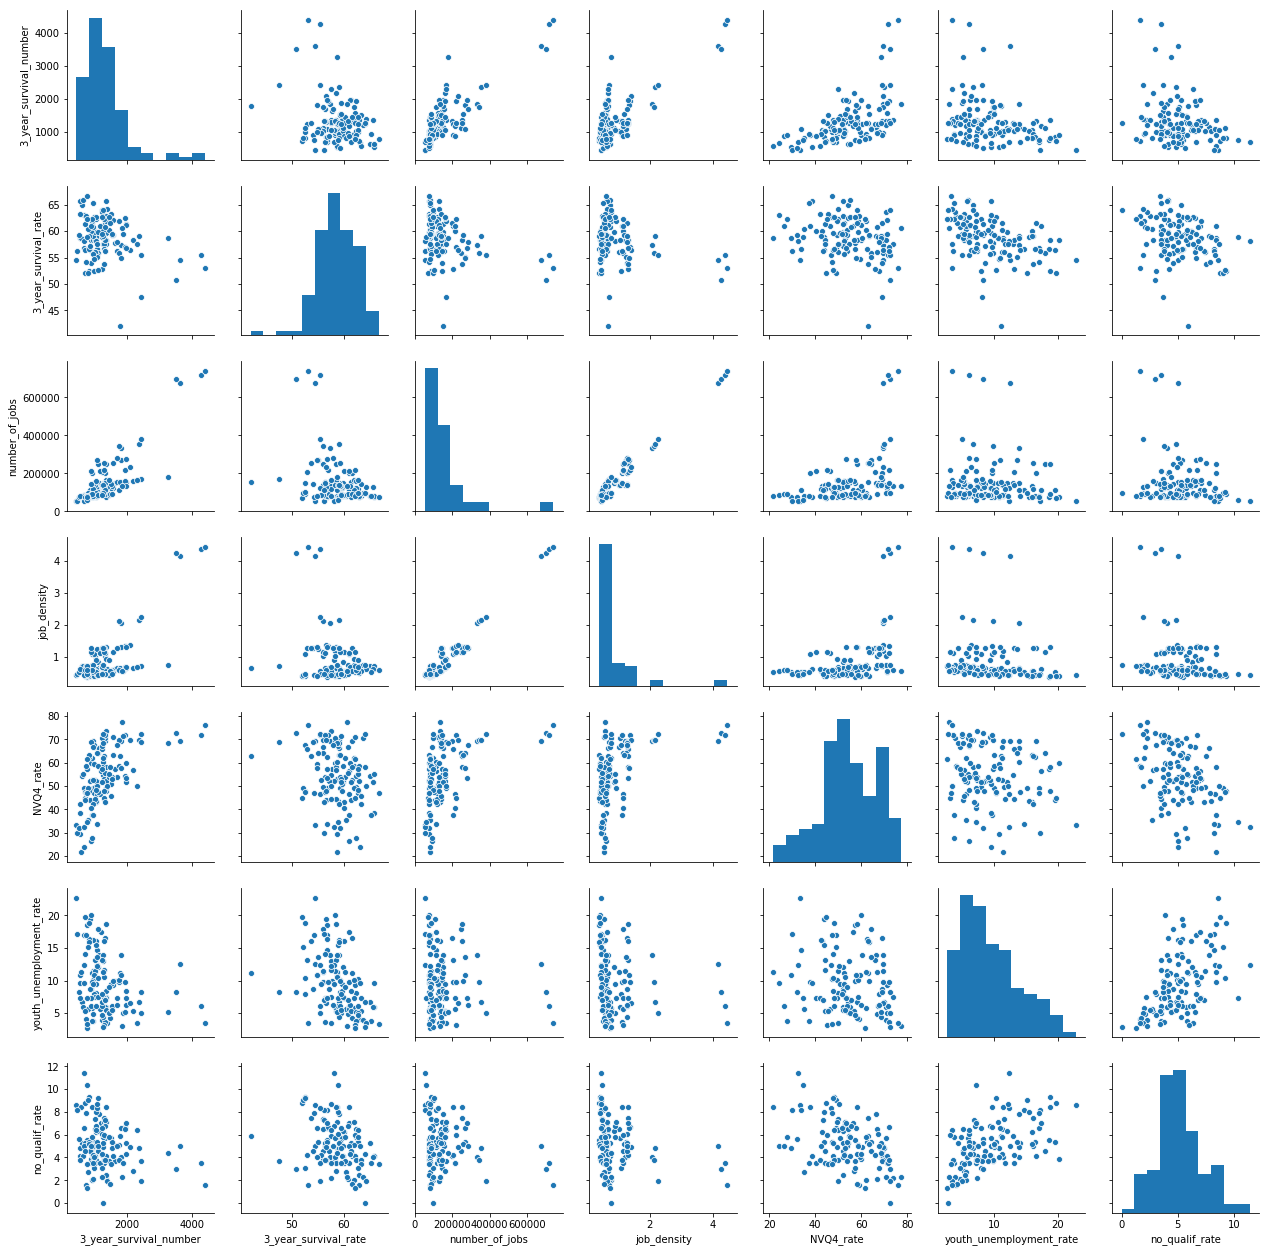

In [26]:
#1 is the relationship linear?
sns.pairplot(data=df)
## --> 3_year_survival_number, number_of_jobs, job_density might be not entirely linearly correlated, but mainly due to quite recognisable outliers

In [28]:
#probably not necessary
from sklearn.preprocessing import PolynomialFeatures 
   
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
   
poly.fit(X_poly, y) 
X_poly = sm.add_constant(X_poly)
results = sm.OLS(y,X_poly).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.577
Model:                                 OLS   Adj. R-squared:                  0.524
Method:                      Least Squares   F-statistic:                     11.00
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):           2.07e-15
Time:                             18:28:49   Log-Likelihood:                -320.53
No. Observations:                      128   AIC:                             671.1
Df Residuals:                          113   BIC:                             713.8
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3059     55.762      0.472      0.638     -84.168     136.780
x1            -0.0478      0.018     -2.716      0.008      -0.083      -0.013
x2             0.9188      1.791      0.513      0.609      -2.629       4.467
x3             0.0006      0.000      1.919      0.058   -2.01e-05       0.001
x4           -90.1539     42.678     -2.112      0.037    -174.706      -5.602
x5          2.148e-06   1.38e-06      1.560      0.122    -5.8e-07    4.88e-06
x6             0.0006      0.000      2.207      0.029    6.47e-05       0.001
x7         -7.277e-09   4.96e-08     -0.147      0.884   -1.06e-07     9.1e-08
x8            -0.0012      0.007     -0.176      0.861      -0.015       0.012
x9            -0.0181      0.015     -1.238      0.218      -0.047       0.011
x10        -8.055e-06   5.18e-06     -1.555      0.123   -1.83e-05    2.21e-06
x11            1.2006      0.711      1.689      0.094      -0.208       2.609
x12        -7.757e-10   3.86e-10     -2.010      0.047   -1.54e-09    -1.1e-11
x13            0.0002      0.000      1.720      0.088   -2.77e-05       0.000
x14           -7.5272      8.956     -0.840      0.402     -25.271      10.216
==============================================================================
Omnibus:                        8.121   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.850
Skew:                           0.579   Prob(JB):                       0.0197
Kurtosis:                       3.359   Cond. No.                     1.96e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#2 is the Durbin-Watson-Test=2?
results = sm.OLS(y,X).fit() #check same for (y,Z)
results.summary() 
## --> the Durbin-Watson-Test is smaller than 2 for both, so there might be positive autocorrelation in residuals...

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.830
Model:                                 OLS   Adj. R-squared:                  0.825
Method:                      Least Squares   F-statistic:                     151.8
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):           8.80e-47
Time:                             18:32:13   Log-Likelihood:                -369.65
No. Observations:                      128   AIC:                             747.3
Df Residuals:                          124   BIC:                             758.7
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
3_year_survival_number    -0.0055      0.001     -4.937      0.000      -0.008      -0.003
3_year_survival_rate       0.2129      0.015     14.103      0.000       0.183       0.243
number_of_jobs          7.708e-05   1.64e-05      4.703      0.000    4.46e-05       0.000
job_density               -8.8071      2.328     -3.783      0.000     -13.416      -4.199
==============================================================================
Omnibus:                        4.296   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.232
Skew:                           0.443   Prob(JB):                        0.121
Kurtosis:                       2.910   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

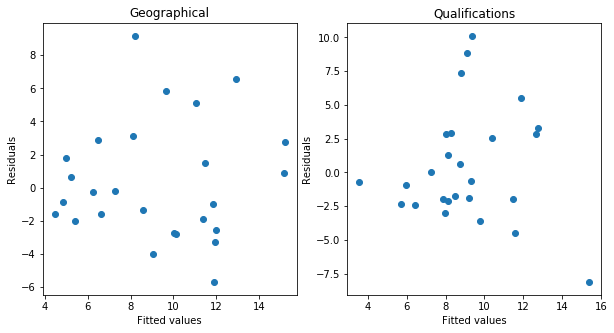

In [73]:
#3 Is there a funnel like shape?
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Geographical")
plt.scatter(ypred1, (y_test-ypred1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.title("Qualifications")
plt.scatter(ypred2, (y_test-ypred2))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
#does not look much like a funnel like shape in both cases, but very dispersed residuals, maybe slight funnel shape in qualifications

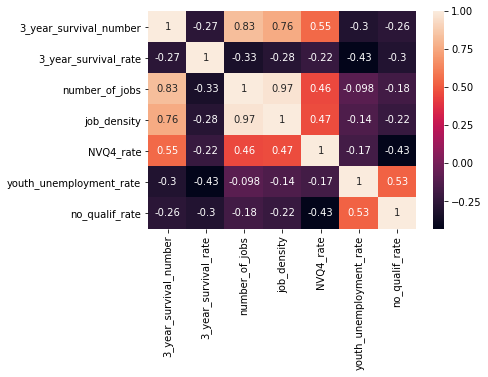

In [43]:
#4 Is one of the predictor variables highly correlated with another one?
sns.heatmap(df.corr(),annot=True)
#there is a high correlation btw. number of jobs and job density --> drop number of jobs (resolves also high correlation with survival rate of businesses)

Text(0.5, 0, 'Residuals')

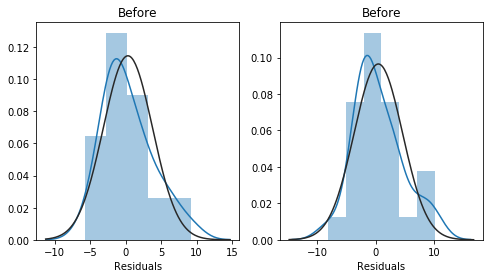

In [89]:
#5 Are the residuals normally distributed?
plt.subplots(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(y_test-ypred1 , fit=norm);
plt.xlabel('Residuals')

plt.subplot(1,2,2)
plt.title("Before")
sns.distplot(y_test-ypred2 , fit=norm);
plt.xlabel('Residuals')
#both slightly deviate from normal distribution, but maybe not too significantly?